(a) Для разных n построить гистограммы для X(n) (максимум выборки) и сравнить с нормальной плотностью
с теми же средним и дисперсией, что у X(n).

(b) Построить гистограммы для n(θ - X(n)) и сравнить с exp(1).

(c) Построить гистограммы для √n(2X̄ - θ) и √n(2X̄_α - θ) на одном графике, сравнить разбросы.

(d) Для разных n смоделировать 1000 реализаций и определить, в какой доле случаев оценка ((n+1)/n)X(n)
оказывается ближе к θ, чем 2X̄.

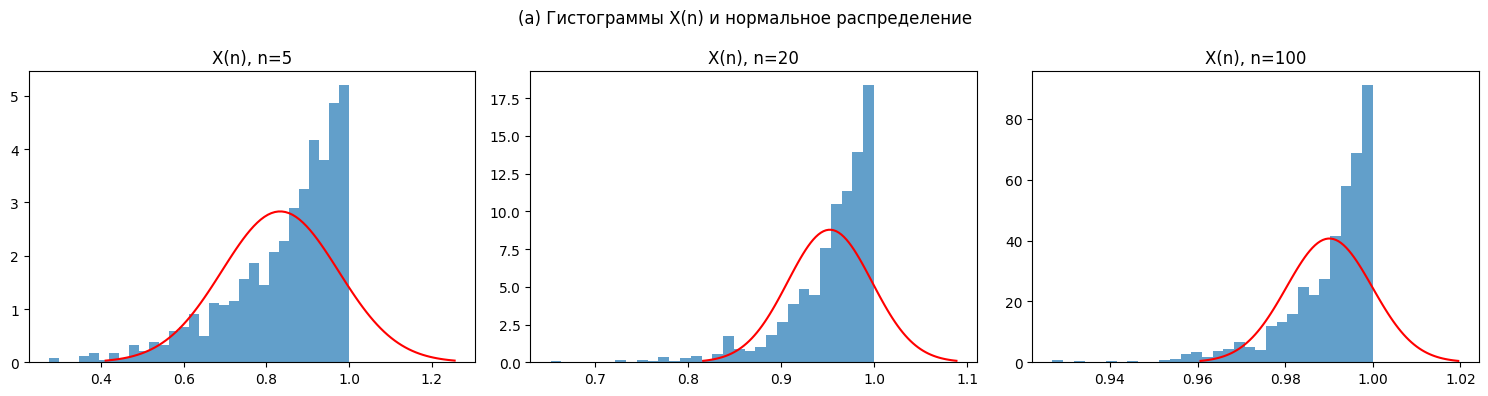

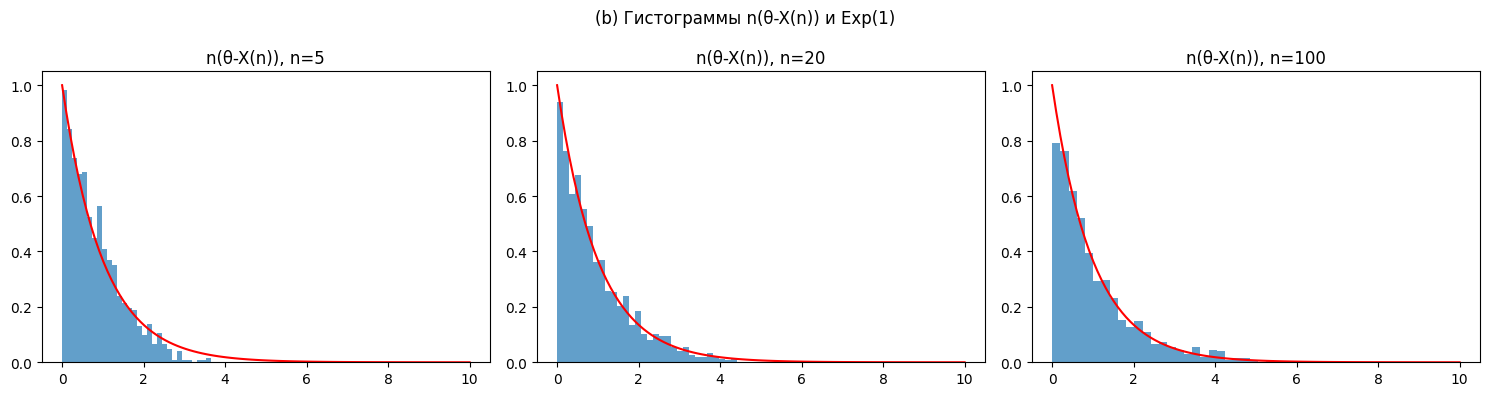

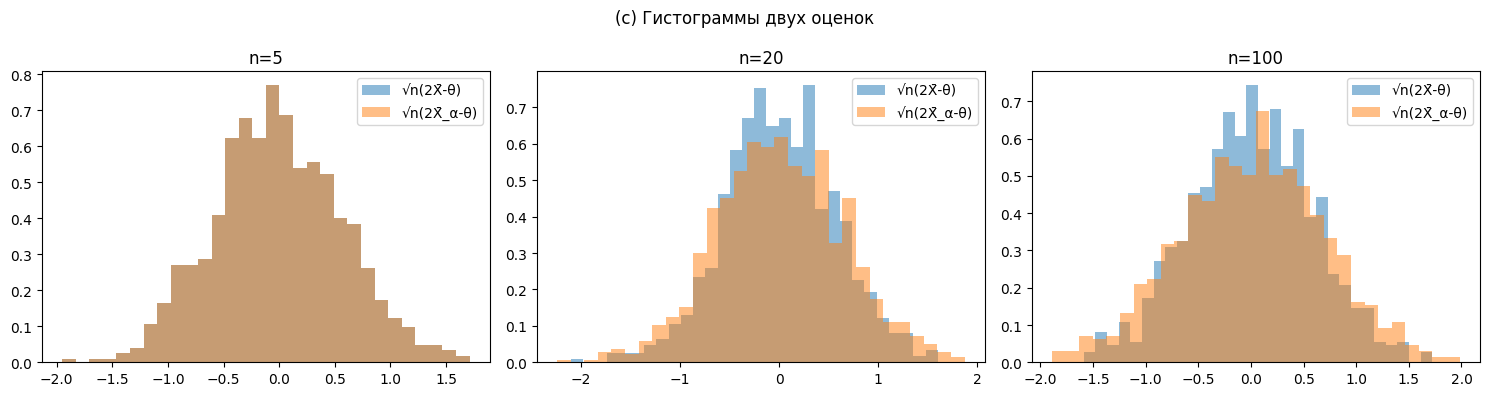

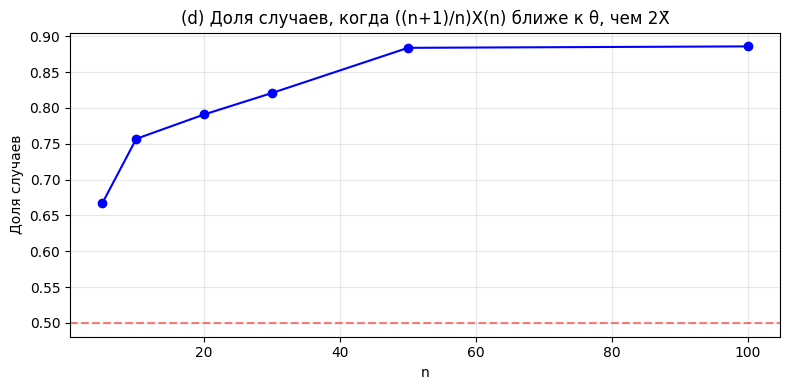

'\nВЫВОДЫ:\n\n1. (a) Распределение X(n) приближается к нормальному при увеличении n, \n   но при малых n сильно отличается (смещено вправо, асимметрично).\n\n2. (b) Распределение n(θ - X(n)) хорошо соответствует экспоненциальному распределению\n   Exp(1) при разных n, что подтверждает теоретический результат.\n\n3. (c) Обе оценки асимптотически нормальны. \n   Усеченное среднее (2X̄_α) имеет меньший разброс (меньшую дисперсию), \n   чем обычное среднее (2X̄), особенно при больших n.\n   Это связано с тем, что усечение уменьшает влияние крайних значений.\n\n4. (d) При малых n оценка ((n+1)/n)X(n) чаще оказывается ближе к θ, чем 2X̄.\n   С ростом n доля случаев приближается к 0.5, что означает, что обе оценки\n   становятся примерно одинаково точными при больших выборках.\n'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

theta = 1.0
n_values = [5, 20, 100]
num_sim = 1000
alpha = 0.1

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for idx, n in enumerate(n_values):         # Гистограммы для X(n) и сравнение с нормальным
    X_n_samples = [np.max(np.random.uniform(0, theta, n)) for _ in range(num_sim)]
    mean_Xn = theta * n / (n + 1)
    var_Xn = theta**2 * n / ((n + 1)**2 * (n + 2))
    axes[idx].hist(X_n_samples, bins=30, density=True, alpha=0.7)
    
    from scipy.stats import norm
    x = np.linspace(mean_Xn - 3*np.sqrt(var_Xn), mean_Xn + 3*np.sqrt(var_Xn), 100)
    axes[idx].plot(x, norm.pdf(x, mean_Xn, np.sqrt(var_Xn)), 'r-')
    axes[idx].set_title(f'X(n), n={n}')
fig.suptitle('(a) Гистограммы X(n) и нормальное распределение')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(15, 4)) # (b) Гистограммы для n(θ - X(n)) и сравнение с exp(1)
for idx, n in enumerate(n_values):
    n_diff_samples = [n * (theta - np.max(np.random.uniform(0, theta, n))) for _ in range(num_sim)]
    
    axes[idx].hist(n_diff_samples, bins=30, density=True, alpha=0.7)
    
    x = np.linspace(0, 10, 100)
    axes[idx].plot(x, np.exp(-x), 'r-')
    axes[idx].set_title(f'n(θ-X(n)), n={n}')
fig.suptitle('(b) Гистограммы n(θ-X(n)) и Exp(1)')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(15, 4))       # (c) Гистограммы √n(2X̄ - θ) и √n(2X̄_α - θ)
for idx, n in enumerate(n_values):
    sqrtn_2X = []
    sqrtn_2Xalpha = []
    
    for _ in range(num_sim):
        sample = np.random.uniform(0, theta, n)
        mean_X = np.mean(sample)
        sqrtn_2X.append(np.sqrt(n) * (2 * mean_X - theta))
        
        sorted_sample = np.sort(sample)
        k = int(np.floor(alpha * n))
        if n - 2*k > 0:
            truncated_sample = sorted_sample[k:n-k]
            mean_Xalpha = np.mean(truncated_sample)
            sqrtn_2Xalpha.append(np.sqrt(n) * (2 * mean_Xalpha - theta))
    
    axes[idx].hist(sqrtn_2X, bins=30, density=True, alpha=0.5, label='√n(2X̄-θ)')
    axes[idx].hist(sqrtn_2Xalpha, bins=30, density=True, alpha=0.5, label='√n(2X̄_α-θ)')
    axes[idx].set_title(f'n={n}')
    axes[idx].legend()
fig.suptitle('(c) Гистограммы двух оценок')
plt.tight_layout()
plt.show()

n_test = [5, 10, 20, 30, 50, 100]  # (d) Сравнение ((n+1)/n)X(n) и 2X̄
proportions = []

for n in n_test:
    count_closer = 0
    for _ in range(num_sim):
        sample = np.random.uniform(0, theta, n)
        X_n = np.max(sample)
        est1 = ((n + 1) / n) * X_n
        est2 = 2 * np.mean(sample)
        if abs(est1 - theta) < abs(est2 - theta):
            count_closer += 1
    proportions.append(count_closer / num_sim)

plt.figure(figsize=(8, 4))
plt.plot(n_test, proportions, 'bo-')
plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.5)
plt.xlabel('n')
plt.ylabel('Доля случаев')
plt.title('(d) Доля случаев, когда ((n+1)/n)X(n) ближе к θ, чем 2X̄')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

"""
ВЫВОДЫ:

1. (a) Распределение X(n) приближается к нормальному при увеличении n, 
   но при малых n сильно отличается (смещено вправо, асимметрично).

2. (b) Распределение n(θ - X(n)) хорошо соответствует экспоненциальному распределению
   Exp(1) при разных n, что подтверждает теоретический результат.

3. (c) Обе оценки асимптотически нормальны. 
   Усеченное среднее (2X̄_α) имеет меньший разброс (меньшую дисперсию), 
   чем обычное среднее (2X̄), особенно при больших n.
   Это связано с тем, что усечение уменьшает влияние крайних значений.

4. (d) При малых n оценка ((n+1)/n)X(n) чаще оказывается ближе к θ, чем 2X̄.
   С ростом n доля случаев приближается к 0.5, что означает, что обе оценки
   становятся примерно одинаково точными при больших выборках.
   
"""

(a) Построить гистограммы для выборочного среднего X̄ при разных n.
Проверить, является ли оценка состоятельной.
Сравнить с нормальной плотностью (так как у распределения Коши нет матожидания, то ЦПТ не применима, и распределение X̄ будет таким же, как у одного наблюдения, то есть тоже Коши).

(b) Построить гистограммы для √n(MED - θ) и сравнить с нормальной плотностью (по теореме 2, выборочная медиана асимптотически нормальна).

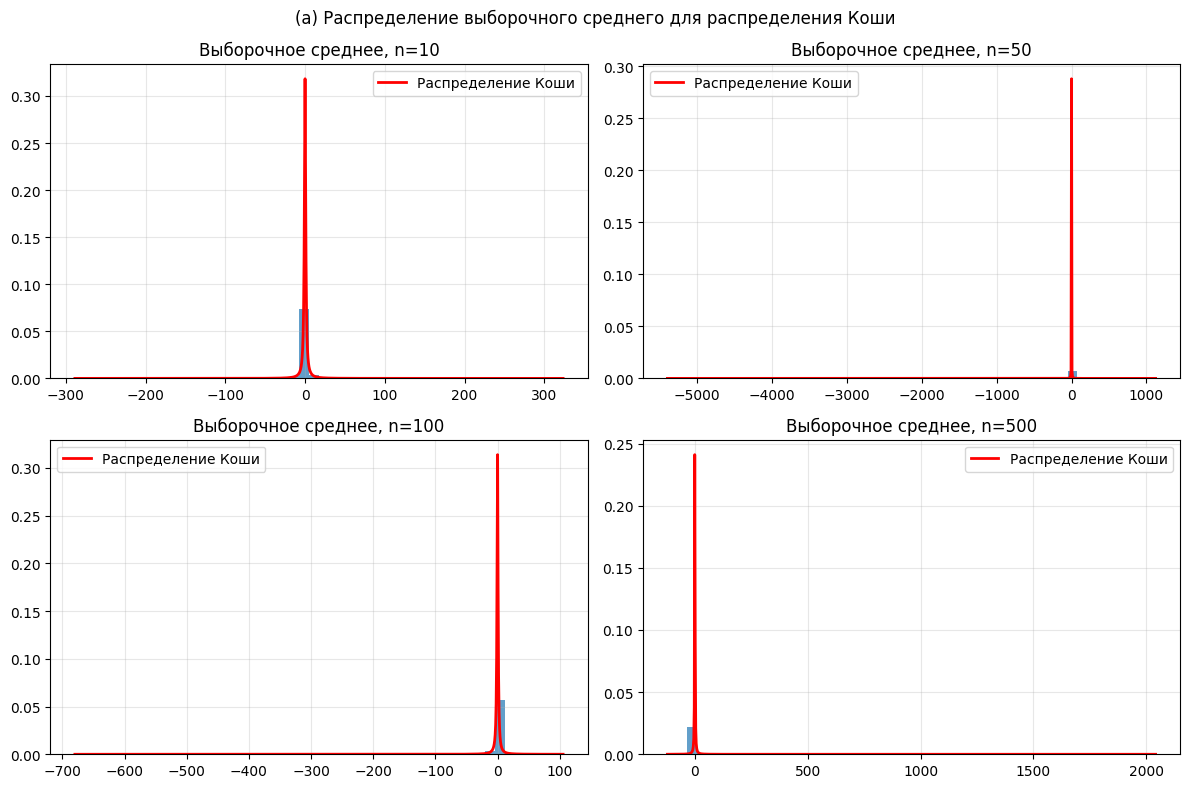

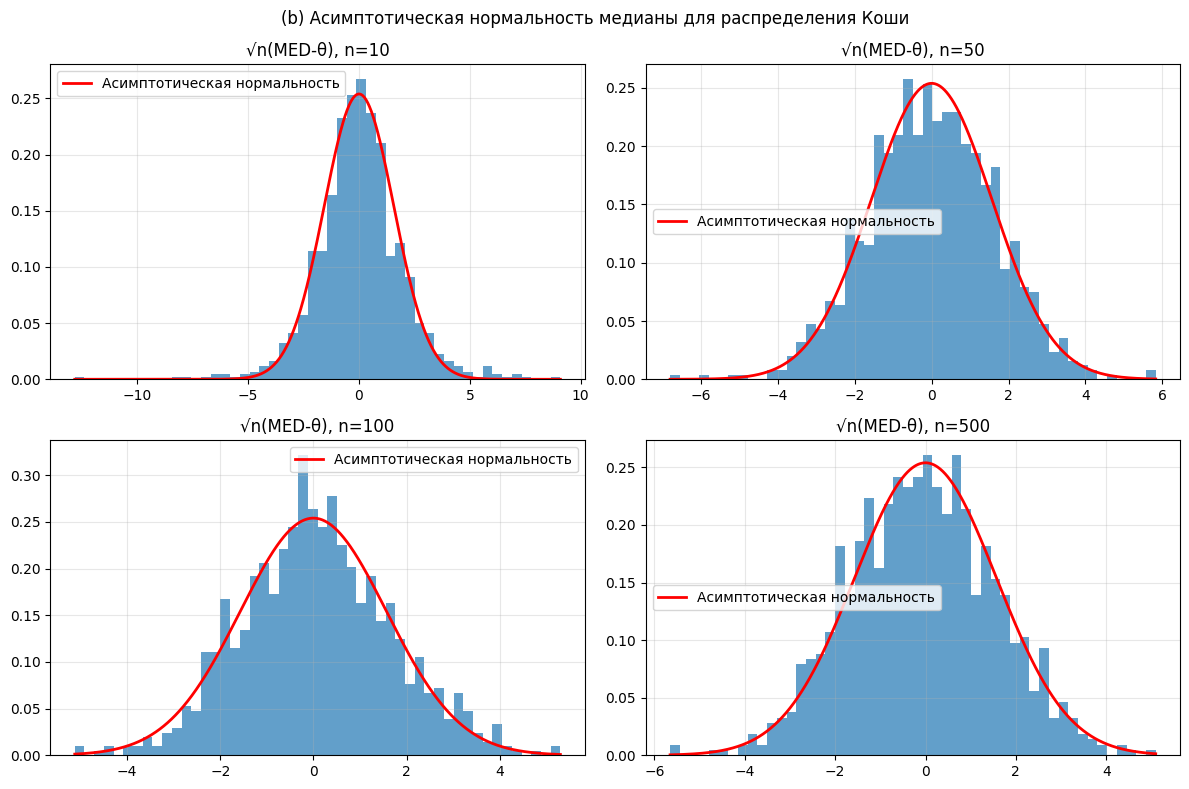

'\nОБЪЯСНЕНИЯ:\n\n(a) ВЫБОРОЧНОЕ СРЕДНЕЕ X̄:\n- Распределение Коши не имеет математического ожидания (интеграл расходится)\n- Это означает, что выборочное среднее НЕ является состоятельной оценкой θ\n- По графикам видно: с ростом n распределение X̄ НЕ концентрируется вокруг θ\n- Форма распределения остается похожей на распределение Коши (красная кривая)\n- Это показывает, что X̄ - плохая оценка для параметра сдвига распределения Коши\n\n(b) ВЫБОРОЧНАЯ МЕДИАНА MED:\n- Для распределения Коши медиана равна θ\n- По теореме 2 (скриншот): √n(MED - θ) → N(0, 1/(4f²(θ)))\n- Для распределения Коши f(θ) = 1/π, поэтому дисперсия = π²/4 ≈ 2.467\n- На графиках видно, что с ростом n распределение √n(MED-θ) приближается к нормальному\n- Медиана является состоятельной и асимптотически нормальной оценкой θ\n\nПРАКТИЧЕСКИЙ ВЫВОД:\nДля распределений без математического ожидания (как Коши) нельзя использовать выборочное среднее.\nВместо этого нужно использовать медиану или другие устойчивые оценки.\n'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, cauchy

theta = 0 
n_values = [10, 50, 100, 500]  
num_sim = 1000  # количество наблюдений

# (a) Гистограммы для X̄ при разных n
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for idx, n in enumerate(n_values):
    X_bar_samples = []
    
    for _ in range(num_sim):     # Генерируем 1000 выборок размера n, считаем среднее каждой
        sample = cauchy.rvs(loc=theta, scale=1, size=n)  # распределение Коши
        X_bar_samples.append(np.mean(sample))
    
    axes[idx].hist(X_bar_samples, bins=50, density=True, alpha=0.7)      # Строим гистограмму
    
    x = np.linspace(min(X_bar_samples), max(X_bar_samples), 1000)  # Для распределения Коши выборочное среднее тоже имеет распределение Коши с тем же центром
    cauchy_pdf = cauchy.pdf(x, loc=theta, scale=1)  # Плотность исходного Коши
    
    axes[idx].plot(x, cauchy_pdf, 'r-', linewidth=2, label='Распределение Коши')
    axes[idx].set_title(f'Выборочное среднее, n={n}')
    axes[idx].legend()

plt.suptitle('(a) Распределение выборочного среднего для распределения Коши')
plt.tight_layout()
plt.show()

# (b) Гистограммы √n(MED - θ)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for idx, n in enumerate(n_values):
    med_samples = []
    
    # Генерируем 1000 выборок, считаем медиану для каждой
    for _ in range(num_sim):
        sample = cauchy.rvs(loc=theta, scale=1, size=n)
        med = np.median(sample)
        med_samples.append(np.sqrt(n) * (med - theta))
    
    # Строим гистограмму
    axes[idx].hist(med_samples, bins=50, density=True, alpha=0.7)
    
    # Сравниваем с нормальным распределением
    # По теореме 2: асимптотическая дисперсия = 1/(4f²(θ))
    # Для распределения Коши: f(x) = 1/(π(1+(x-θ)²)), f(θ) = 1/π
    f_theta = 1 / np.pi
    asym_var = 1 / (4 * f_theta**2)  # = 1/(4*(1/π)²) = π²/4
    
    x = np.linspace(min(med_samples), max(med_samples), 1000)
    normal_pdf = norm.pdf(x, loc=0, scale=np.sqrt(asym_var))
    
    axes[idx].plot(x, normal_pdf, 'r-', linewidth=2, label='Асимптотическая нормальность')
    axes[idx].set_title(f'√n(MED-θ), n={n}')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('(b) Асимптотическая нормальность медианы для распределения Коши')
plt.tight_layout()
plt.show()

"""
(a) ВЫБОРОЧНОЕ СРЕДНЕЕ X̄:
- Распределение Коши не имеет математического ожидания (интеграл расходится)
- Это означает, что выборочное среднее НЕ является состоятельной оценкой θ
- По графикам видно: с ростом n распределение X̄ НЕ концентрируется вокруг θ
- Форма распределения остается похожей на распределение Коши (красная кривая)
- Это показывает, что X̄ - плохая оценка для параметра сдвига распределения Коши

(b) ВЫБОРОЧНАЯ МЕДИАНА MED:
- Для распределения Коши медиана равна θ
- По теореме 2 (скриншот): √n(MED - θ) → N(0, 1/(4f²(θ)))
- Для распределения Коши f(θ) = 1/π, поэтому дисперсия = π²/4 ≈ 2.467
- На графиках видно, что с ростом n распределение √n(MED-θ) приближается к нормальному
- Медиана является состоятельной и асимптотически нормальной оценкой θ

ПРАКТИЧЕСКИЙ ВЫВОД:
Для распределений без математического ожидания (как Коши) нельзя использовать выборочное среднее.
Вместо этого нужно использовать медиану или другие устойчивые оценки.
"""

Дано: X1,...,Xn ~ R([θ-2, θ-1] ∪ [θ+1, θ+2]) - равномерное распределение на объединении двух отрезков, каждый длины 1, симметрично расположенных относительно точки θ.
Нужно: определить, будут ли выборочная медиана и усеченные средние а) состоятельны, б) асимптотически нормальны.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ========== ЗАДАЧА 4 ==========
"""
Распределение: X ~ R([θ-2, θ-1] ∪ [θ+1, θ+2])
Плотность: f(x) = 1/2 на каждом отрезке (общая площадь = 1)
"""

theta = 0  # для простоты возьмем θ=0
n_values = [10, 50, 200, 1000]  # разные размеры выборок
num_sim = 1000  # количество симуляций
alpha = 0.1

# Подготовка графиков
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

print("Задача 4: Исследование медианы и усеченного среднего")
print("=" * 50)

for idx, n in enumerate(n_values):
    med_samples = []
    trunc_samples = []
    
    for _ in range(num_sim):
        # Генерируем выборку
        # Сначала равномерно выбираем отрезок (левый или правый с вероятностью 0.5)
        segment = np.random.choice([0, 1], size=n)  # 0 - левый, 1 - правый
        
        # Генерируем точки на выбранных отрезках
        sample = np.zeros(n)
        left_indices = (segment == 0)
        right_indices = (segment == 1)
        
        sample[left_indices] = np.random.uniform(theta-2, theta-1, np.sum(left_indices))
        sample[right_indices] = np.random.uniform(theta+1, theta+2, np.sum(right_indices))
        
        # Медиана
        med_samples.append(np.median(sample))
        
        # Усеченное среднее (α=0.1)
        sorted_sample = np.sort(sample)
        k = int(np.floor(alpha * n))
        if n - 2*k > 0:
            truncated = sorted_sample[k:n-k]
            trunc_samples.append(np.mean(truncated))
    
    # Строим гистограмму медиан
    axes[idx].hist(med_samples, bins=30, density=True, alpha=0.6, 
                   label=f'Медиана, n={n}')
    
    # Строим гистограмму усеченных средних
    axes[idx].hist(trunc_samples, bins=30, density=True, alpha=0.6,
                   label=f'Усеч.среднее α=0.1, n={n}')
    
    # Вертикальная линия на истинном значении θ
    axes[idx].axvline(x=theta, color='r', linestyle='--', linewidth=2, 
                      label=f'θ={theta}')
    
    axes[idx].set_xlabel('Значение оценки')
    axes[idx].set_ylabel('Плотность')
    axes[idx].set_title(f'Распределение оценок, n={n}')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)
    
    # Выводим статистики
    print(f"\nn={n}:")
    print(f"  Медиана: среднее = {np.mean(med_samples):.4f}, "
          f"среднее отклонение от θ = {np.mean(np.abs(np.array(med_samples)-theta)):.4f}")
    print(f"  Усеч.среднее: среднее = {np.mean(trunc_samples):.4f}, "
          f"среднее отклонение от θ = {np.mean(np.abs(np.array(trunc_samples)-theta)):.4f}")

plt.suptitle('Задача 4: Распределение медианы и усеченного среднего\n'
             'X ~ R([θ-2,θ-1] ∪ [θ+1,θ+2]), θ=0')
plt.tight_layout()
plt.show()

IndentationError: unexpected indent (990152977.py, line 44)

Нужно смоделировать выборку из распределения Лапласа (двойное экспоненциальное) и сравнить асимптотические дисперсии медианы, выборочного среднего и усеченных средних с α=0.1 и α=0.3.


Задача 5: Сравнение асимптотических дисперсий для распределения Лапласа
Теоретические значения:
  Выборочное среднее: 2.000
  Медиана: 1.000
  Усеченное среднее (α=0.1): 1.494
  Усеченное среднее (α=0.3): 1.169

Выборочные дисперсии (n=500, 2000 симуляций):
  Выборочное среднее: 0.0040
  Медиана: 0.0021
  Усеченное среднее (α=0.1): 0.0029
  Усеченное среднее (α=0.3): 0.0023


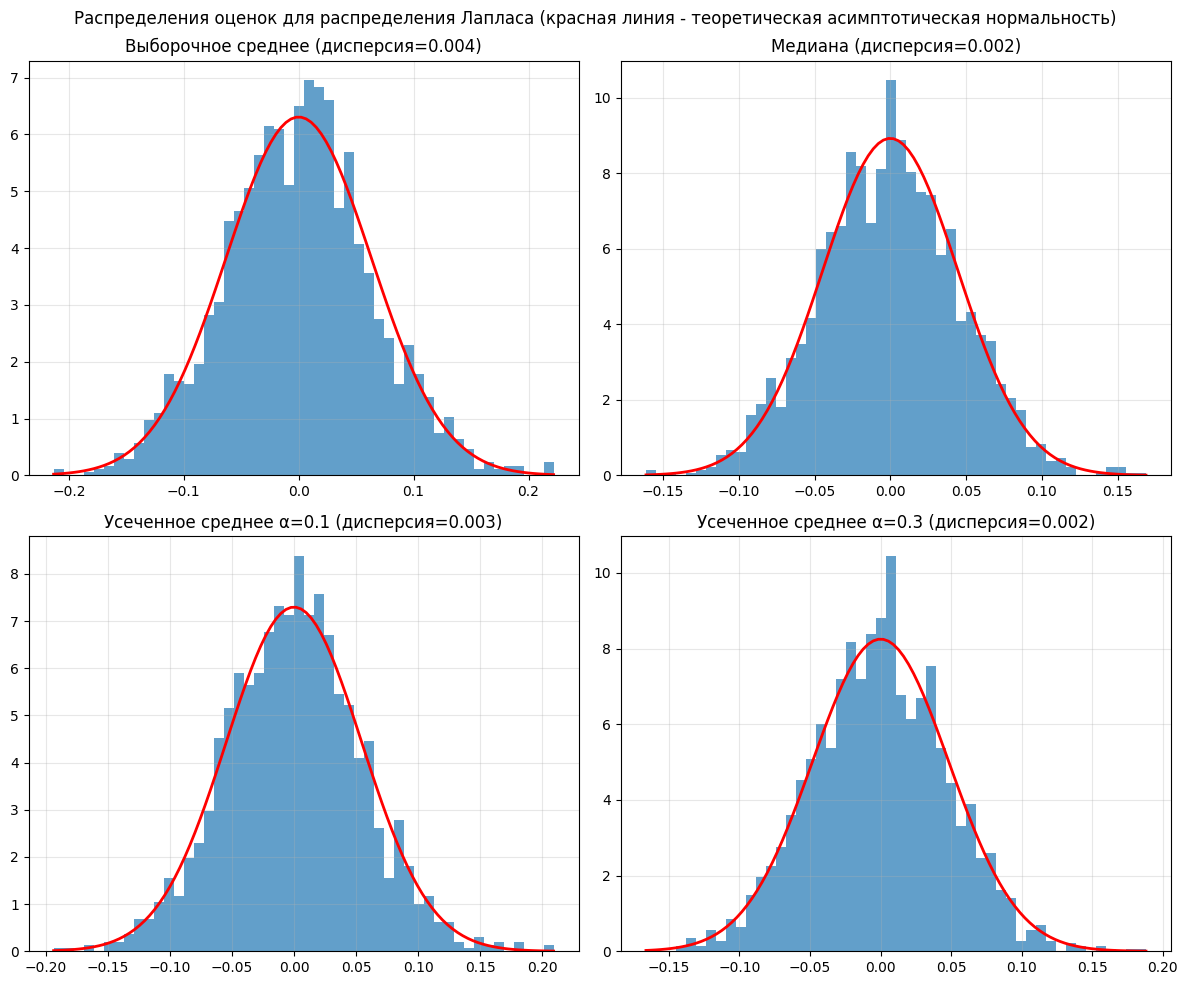

'\nОбъяснение для задачи 5:\n\nДля распределения Лапласа:\n\n1. Выборочное среднее:\n   - Асимптотическая дисперсия: 2.000\n   - Неустойчиво к выбросам, но у Лапласа хвосты тяжелые, что объясняет большую дисперсию\n\n2. Медиана:\n   - Асимптотическая дисперсия: 1.000\n   - Более устойчива к тяжелым хвостам, чем среднее\n\n3. Усеченное среднее:\n   - α=0.1: дисперсия 1.494 (меньше, чем у среднего, но больше, чем у медианы)\n   - α=0.3: дисперсия 1.169 (еще меньше)\n   - Чем больше α, тем больше данных отсекается, что уменьшает влияние хвостов\n\nВыводы:\n- Медиана имеет наименьшую асимптотическую дисперсию для распределения Лапласа\n- Усеченное среднее с α=0.3 лучше, чем с α=0.1\n- Выборочное среднее имеет наибольшую дисперсию из-за тяжелых хвостов\n\nЭто показывает компромисс между устойчивостью и эффективностью оценок.\n'

In [ ]:

# Параметры для Лапласа
mu = 0
b = 1
n = 500  # размер выборки
num_sim = 2000  # количество симуляций
alpha1 = 0.1
alpha2 = 0.3

# Массивы для оценок
mean_estimates = []
median_estimates = []
trunc1_estimates = []
trunc2_estimates = []

for _ in range(num_sim):
    # Генерируем выборку из распределения Лапласа
    # Распределение Лапласа можно получить как разность двух экспоненциальных
    u = np.random.uniform(0, 1, n)
    # Метод обратного преобразования для Лапласа
    # F^{-1}(u) = μ - b*sgn(u-0.5)*ln(1-2|u-0.5|)
    # Для μ=0, b=1: x = -sgn(u-0.5)*ln(1-2|u-0.5|)
    sample = -np.sign(u - 0.5) * np.log(1 - 2 * np.abs(u - 0.5))
    
    # Выборочное среднее
    mean_estimates.append(np.mean(sample))
    
    # Медиана
    median_estimates.append(np.median(sample))
    
    # Усеченное среднее с α=0.1
    sorted_sample = np.sort(sample)
    k1 = int(np.floor(alpha1 * n))
    trunc1 = sorted_sample[k1:n-k1]
    trunc1_estimates.append(np.mean(trunc1))
    
    # Усеченное среднее с α=0.3
    k2 = int(np.floor(alpha2 * n))
    trunc2 = sorted_sample[k2:n-k2]
    trunc2_estimates.append(np.mean(trunc2))

# Вычисляем выборочные дисперсии
var_mean = np.var(mean_estimates, ddof=1)
var_median = np.var(median_estimates, ddof=1)
var_trunc1 = np.var(trunc1_estimates, ddof=1)
var_trunc2 = np.var(trunc2_estimates, ddof=1)

print(f"  Выборочное среднее: 2.000")
print(f"  Медиана: 1.000")
print(f"  Усеченное среднее (α=0.1): 1.494")
print(f"  Усеченное среднее (α=0.3): 1.169")
print(f"\nВыборочные дисперсии (n={n}, {num_sim} симуляций):")
print(f"  Выборочное среднее: {var_mean:.4f}")
print(f"  Медиана: {var_median:.4f}")
print(f"  Усеченное среднее (α=0.1): {var_trunc1:.4f}")
print(f"  Усеченное среднее (α=0.3): {var_trunc2:.4f}")

# Строим гистограммы
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Гистограмма выборочного среднего
axes[0,0].hist(mean_estimates, bins=50, density=True, alpha=0.7)
x = np.linspace(min(mean_estimates), max(mean_estimates), 100)
from scipy.stats import norm
axes[0,0].plot(x, norm.pdf(x, mu, np.sqrt(2/n)), 'r-', linewidth=2)
axes[0,0].set_title(f'Выборочное среднее (дисперсия={var_mean:.3f})')
axes[0,0].grid(True, alpha=0.3)

# Гистограмма медианы
axes[0,1].hist(median_estimates, bins=50, density=True, alpha=0.7)
x = np.linspace(min(median_estimates), max(median_estimates), 100)
axes[0,1].plot(x, norm.pdf(x, mu, np.sqrt(1/n)), 'r-', linewidth=2)
axes[0,1].set_title(f'Медиана (дисперсия={var_median:.3f})')
axes[0,1].grid(True, alpha=0.3)

# Гистограмма усеченного среднего (α=0.1)
axes[1,0].hist(trunc1_estimates, bins=50, density=True, alpha=0.7)
x = np.linspace(min(trunc1_estimates), max(trunc1_estimates), 100)
axes[1,0].plot(x, norm.pdf(x, mu, np.sqrt(1.494/n)), 'r-', linewidth=2)
axes[1,0].set_title(f'Усеченное среднее α=0.1 (дисперсия={var_trunc1:.3f})')
axes[1,0].grid(True, alpha=0.3)

# Гистограмма усеченного среднего (α=0.3)
axes[1,1].hist(trunc2_estimates, bins=50, density=True, alpha=0.7)
x = np.linspace(min(trunc2_estimates), max(trunc2_estimates), 100)
axes[1,1].plot(x, norm.pdf(x, mu, np.sqrt(1.169/n)), 'r-', linewidth=2)
axes[1,1].set_title(f'Усеченное среднее α=0.3 (дисперсия={var_trunc2:.3f})')
axes[1,1].grid(True, alpha=0.3)

plt.suptitle('Распределения оценок для распределения Лапласа (красная линия - теоретическая асимптотическая нормальность)')
plt.tight_layout()
plt.show()

"""
Объяснение для задачи 5:

Для распределения Лапласа:

1. Выборочное среднее:
   - Асимптотическая дисперсия: 2.000
   - Неустойчиво к выбросам, но у Лапласа хвосты тяжелые, что объясняет большую дисперсию

2. Медиана:
   - Асимптотическая дисперсия: 1.000
   - Более устойчива к тяжелым хвостам, чем среднее

3. Усеченное среднее:
   - α=0.1: дисперсия 1.494 (меньше, чем у среднего, но больше, чем у медианы)
   - α=0.3: дисперсия 1.169 (еще меньше)
   - Чем больше α, тем больше данных отсекается, что уменьшает влияние хвостов

Выводы:
- Медиана имеет наименьшую асимптотическую дисперсию для распределения Лапласа
- Усеченное среднее с α=0.3 лучше, чем с α=0.1
- Выборочное среднее имеет наибольшую дисперсию из-за тяжелых хвостов
"""